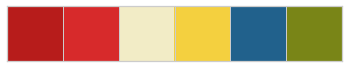

In [231]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
import matplotlib.colors
colors = ["#B71C1B","#D72A2B","#F2ECC6","#F4D03F","#21618C","#798517"]
colors2 = ["#F2ECC6","#D5D68A","#A6AD3C","#798517","#D72A2B"]
cmap = matplotlib.colors.ListedColormap(colors2)
sns.palplot(sns.color_palette(colors))

In [232]:
df = pd.read_csv('../input/customer-personality-analysis/marketing_campaign.csv', sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [234]:
df.isna().sum().sort_values(ascending =False)


Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [235]:
df = df.dropna()

In [236]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2216.0,5588.353339,3249.376275,0.0,2814.75,5458.5,8421.75,11191.0
Year_Birth,2216.0,1968.820397,11.985554,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2216.0,0.441787,0.536896,0.0,0.00,0.0,1.00,2.0
Teenhome,2216.0,0.505415,0.544181,0.0,0.00,0.0,1.00,2.0
Recency,2216.0,49.012635,28.948352,0.0,24.00,49.0,74.00,99.0
MntWines,2216.0,305.091606,337.327920,0.0,24.00,174.5,505.00,1493.0
MntFruits,2216.0,26.356047,39.793917,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2216.0,166.995939,224.283273,0.0,16.00,68.0,232.25,1725.0
MntFishProducts,2216.0,37.637635,54.752082,0.0,3.00,12.0,50.00,259.0


In [237]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [238]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

<AxesSubplot:xlabel='Income'>

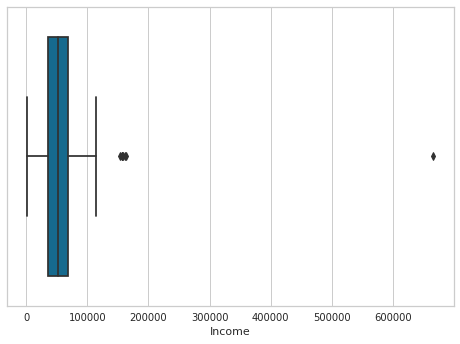

In [239]:
sns.boxplot(data = df, x= 'Income')

<AxesSubplot:xlabel='Income', ylabel='Density'>

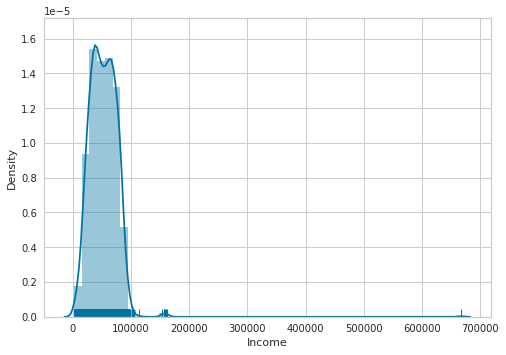

In [240]:
sns.distplot(df['Income'],rug=True,)

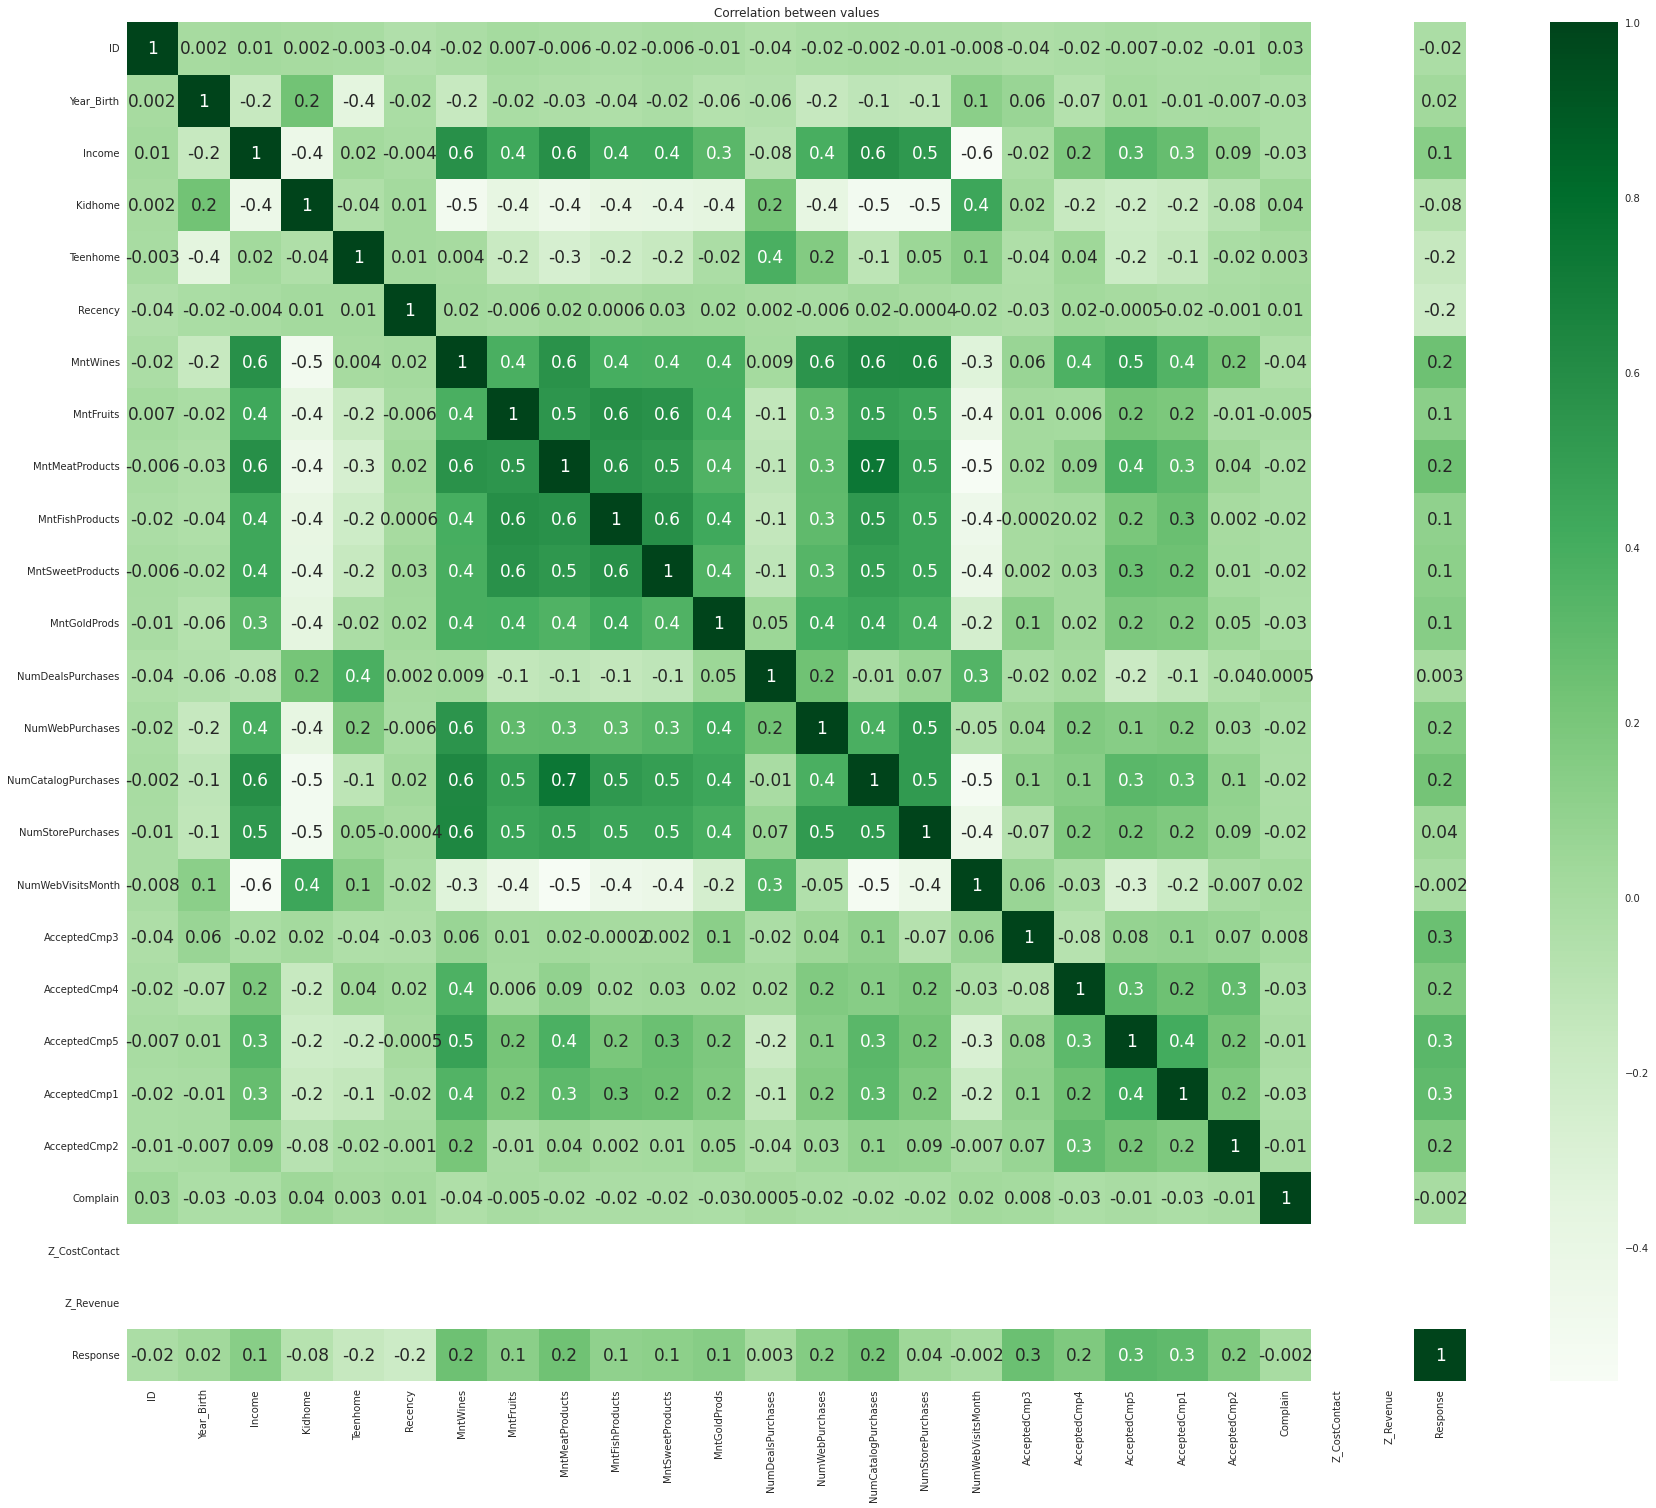

In [241]:
# correlation between columns
fig = plt.figure(figsize=(30,25))
plt.title('Correlation between values')
sns.heatmap(df.corr(), annot=True, cmap="Greens" , fmt=".1g");

In [242]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,2230,2231,2232,2233,2234,2235,2236,2237,2238,2239
ID,5524,2174,4141,6182,5324,7446,965,6177,4855,5899,...,7004,9817,8080,9432,8372,10870,4001,7270,8235,9405
Year_Birth,1957,1954,1965,1984,1981,1967,1971,1985,1974,1950,...,1984,1970,1986,1977,1974,1967,1946,1981,1956,1954
Education,Graduation,Graduation,Graduation,Graduation,PhD,Master,Graduation,PhD,PhD,PhD,...,Graduation,Master,Graduation,Graduation,Graduation,Graduation,PhD,Graduation,Master,PhD
Marital_Status,Single,Single,Together,Together,Married,Together,Divorced,Married,Together,Together,...,Single,Single,Single,Together,Married,Married,Together,Divorced,Together,Married
Income,58138.0,46344.0,71613.0,26646.0,58293.0,62513.0,55635.0,33454.0,30351.0,5648.0,...,11012.0,44802.0,26816.0,666666.0,34421.0,61223.0,64014.0,56981.0,69245.0,52869.0
Kidhome,0,1,0,1,1,0,0,1,1,1,...,1,0,0,1,1,0,2,0,0,1
Teenhome,0,1,0,0,0,1,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
Dt_Customer,04-09-2012,08-03-2014,21-08-2013,10-02-2014,19-01-2014,09-09-2013,13-11-2012,08-05-2013,06-06-2013,13-03-2014,...,16-03-2013,21-08-2012,17-08-2012,02-06-2013,01-07-2013,13-06-2013,10-06-2014,25-01-2014,24-01-2014,15-10-2012
Recency,58,38,26,26,94,16,34,32,19,68,...,82,71,50,23,81,46,56,91,8,40
MntWines,635,11,426,11,173,520,235,76,14,28,...,24,853,5,9,3,709,406,908,428,84


In [243]:
colnames_numerics =['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth']

In [244]:
df_numerics=df.select_dtypes(include=np.number)


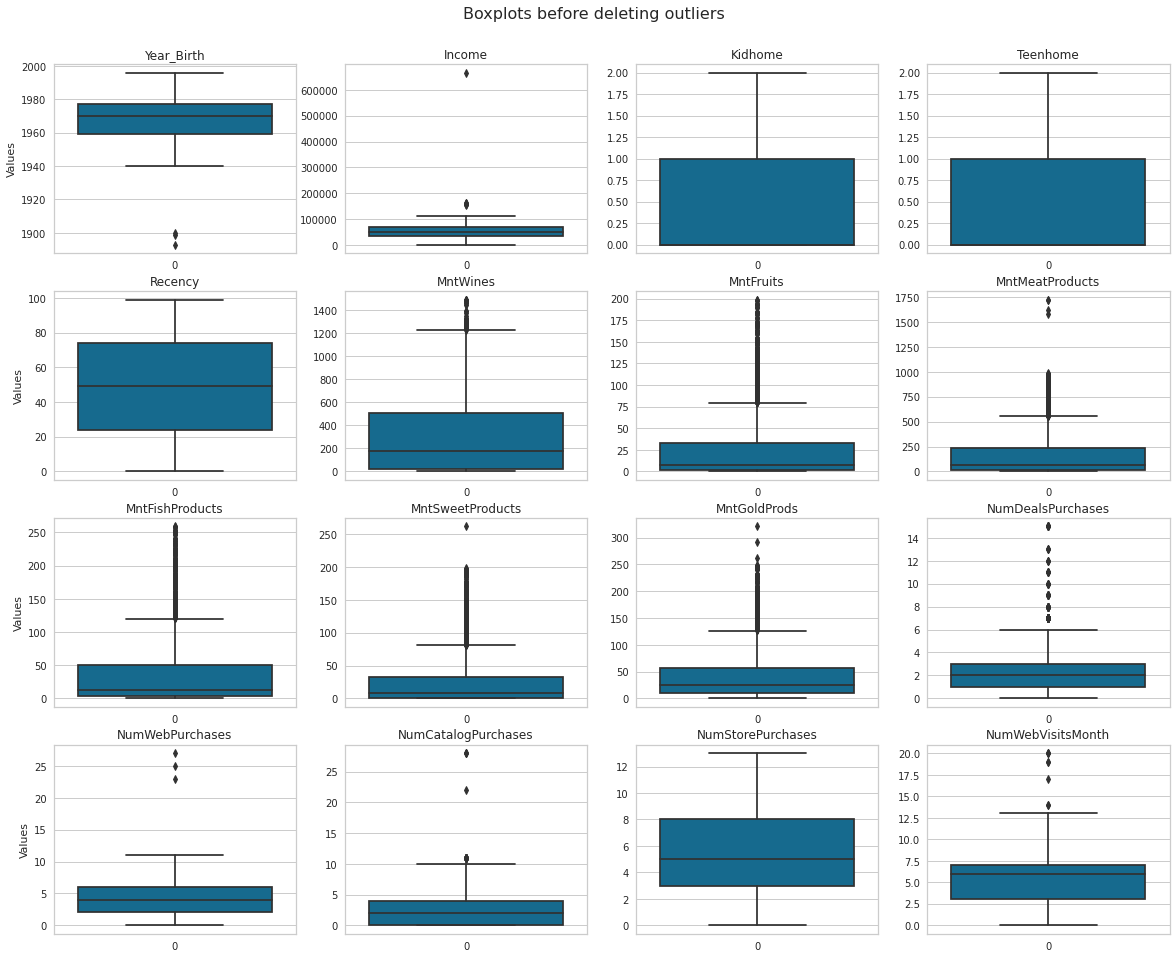

In [245]:
# outliers
def boxplots_custom(dataset, columns_list, rows, cols, suptitle,size=(20,16)):
    fig, axs = plt.subplots(rows, cols,  figsize=size)
    fig.suptitle(suptitle,y=0.93, size=16)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        if i % cols == 0:
            axs[i].set_ylabel('Values')
        sns.boxplot( data=dataset[data], orient='v', ax=axs[i])
        axs[i].set_title(data)
        
boxplots_custom(dataset=df_numerics, columns_list=colnames_numerics, rows=4, cols=4, suptitle='Boxplots before deleting outliers')

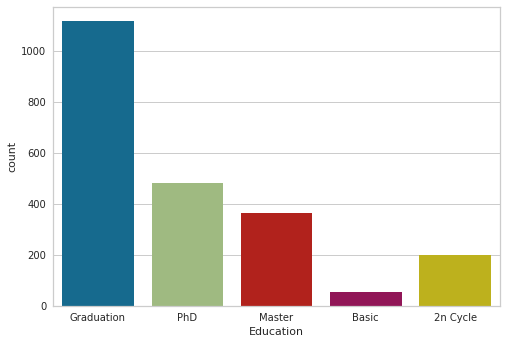

In [246]:
sns.countplot(x = 'Education' , data = df)
plt.show()

In [247]:
obj = ['Education','Marital_Status']


In [248]:
df["Year_Birth"] = 2022-df["Year_Birth"]


In [249]:
df.rename(columns = {'Year_Birth':'Age'},inplace = True)
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,65,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,68,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,57,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,38,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,41,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,55,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,76,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,41,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,66,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


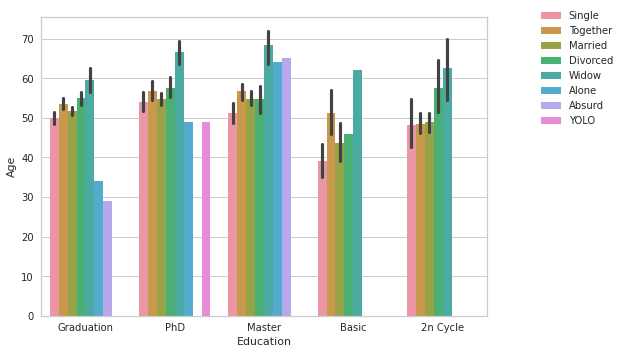

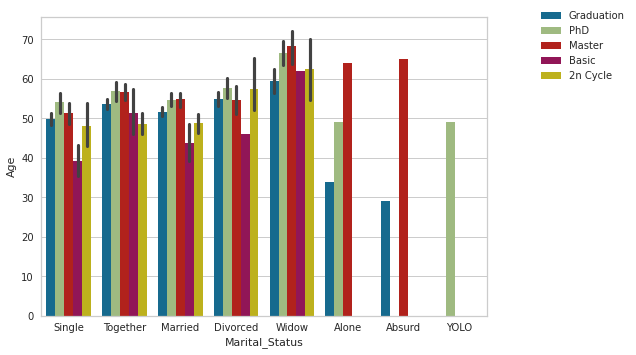

In [250]:
for i in range(len(obj)):
    for j in range(2):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='Age',hue=obj[j],data=df)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()

# eda

In [251]:
df.dropna(inplace = True)


In [252]:
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

In [253]:
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Spent
0,5524,65,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,1617
1,2174,68,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,27
2,4141,57,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,776
3,6182,38,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,53
4,5324,41,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,55,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,1341
2236,4001,76,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,444
2237,7270,41,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,1241
2238,8235,66,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,843


In [254]:
df.drop(['Z_CostContact','Z_Revenue'],axis = 1,inplace = True)


In [255]:
df.rename(columns = {'Year_Birth':'Age'},inplace = True)
df

,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent
0,5524,65,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,4,7,0,0,0,0,0,0,1,1617
1,2174,68,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,2,5,0,0,0,0,0,0,0,27
2,4141,57,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,10,4,0,0,0,0,0,0,0,776
3,6182,38,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,4,6,0,0,0,0,0,0,0,53
4,5324,41,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,55,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,4,5,0,0,0,0,0,0,0,1341
2236,4001,76,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,5,7,0,0,0,1,0,0,0,444
2237,7270,41,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,13,6,0,1,0,0,0,0,0,1241
2238,8235,66,Master,Together,69245.0,0,1,24-01-2014,8,428,...,10,3,0,0,0,0,0,0,0,843


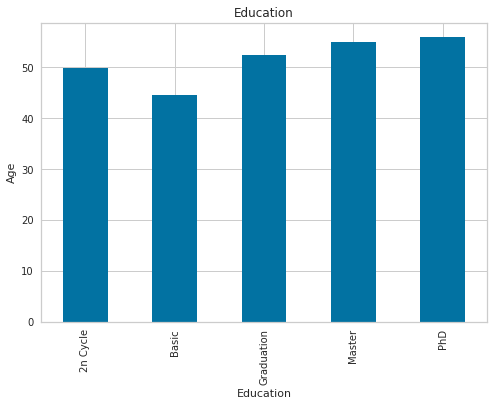

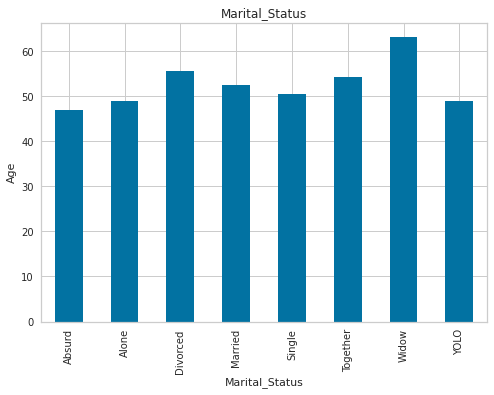

In [256]:
for i in obj:
    data=df.copy()
    data.groupby(i)['Age'].mean().plot.bar()
    plt.xlabel(i)
    plt.ylabel('Age')
    plt.title(i)
    plt.show()

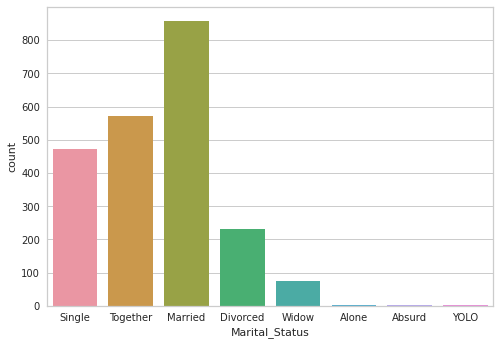

In [257]:
sns.countplot( x = 'Marital_Status',data = df)
plt.show()

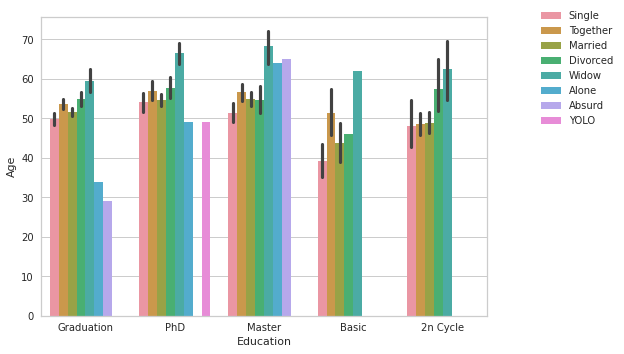

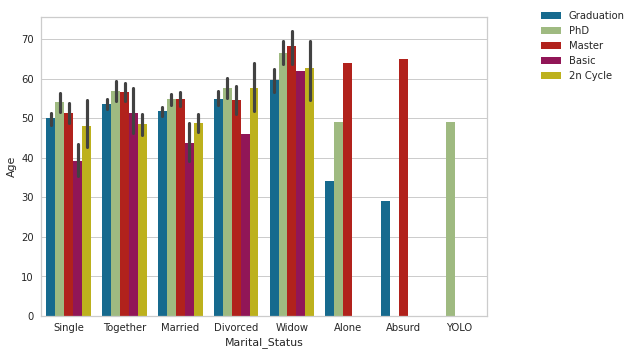

In [258]:
# I found no relations
for i in range(len(obj)):
    for j in range(2):
        x = obj[i]
        if obj[j] != x:
            sns.barplot(x= x,y='Age',hue=obj[j],data=df)
            plt.legend(bbox_to_anchor=(1.1, 1.05))
            plt.show()

In [259]:
y = df.drop(['Education','Marital_Status','Dt_Customer'],axis = 1)

In [260]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in y.columns:
    count_outliers(df,i)

No outliers in ID
There are outliers in Age
Count of outliers are: 3
There are outliers in Income
Count of outliers are: 8
No outliers in Kidhome
No outliers in Teenhome
No outliers in Recency
There are outliers in MntWines
Count of outliers are: 35
There are outliers in MntFruits
Count of outliers are: 246
There are outliers in MntMeatProducts
Count of outliers are: 174
There are outliers in MntFishProducts
Count of outliers are: 222
There are outliers in MntSweetProducts
Count of outliers are: 246
There are outliers in MntGoldProds
Count of outliers are: 205
There are outliers in NumDealsPurchases
Count of outliers are: 84
There are outliers in NumWebPurchases
Count of outliers are: 3
There are outliers in NumCatalogPurchases
Count of outliers are: 23
No outliers in NumStorePurchases
There are outliers in NumWebVisitsMonth
Count of outliers are: 8
There are outliers in AcceptedCmp3
Count of outliers are: 163
There are outliers in AcceptedCmp4
Count of outliers are: 164
There are outl

In [261]:
LE=LabelEncoder()
for i in obj:
    df[i]=df[[i]].apply(LE.fit_transform)
df['Dt_Customer']=df[['Dt_Customer']].apply(LE.fit_transform)

In [262]:
df1 = df.groupby('Age').agg({ 'Education' : 'count', 'Marital_Status' : 'count', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df1.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Spent
Age,,,,,,,,,,,,,,
26,2,2,10960.500000,2,2,52.500000,2.000000,2.000000,0.500000,2.500000,7.000000,0,1,69.000000
27,5,5,60937.000000,5,5,51.600000,1.000000,2.800000,4.800000,7.200000,4.200000,1,1,761.200000
28,3,3,85449.333333,3,3,31.666667,1.000000,5.000000,4.666667,9.333333,3.333333,0,1,1457.333333
29,5,5,74139.800000,5,5,53.800000,1.000000,4.400000,6.800000,5.800000,1.600000,0,2,1191.200000
30,13,13,47830.153846,13,13,45.923077,1.461538,3.153846,3.384615,5.153846,5.230769,0,1,685.538462


In [263]:
# gropubu analysis using education
df2 = df.groupby('Education').agg({ 'Age' : 'mean', 'Education' : 'count', 'Marital_Status' : 'sum', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df2.head()

#Graduation     2
#PhD            4
#Master         3
#2n Cycle       0
#Basic          1

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Spent
Education,,,,,,,,,,,,,,,
0,49.970000,200,740,47633.190000,200,200,48.510000,2.260000,3.765000,2.355000,5.560000,5.460000,4,22,494.930000
1,44.537037,54,210,20306.259259,54,54,48.444444,1.796296,1.888889,0.481481,2.851852,6.870370,0,2,81.796296
2,52.363799,1116,4145,52720.373656,1116,1116,49.879928,2.311828,4.115591,2.738351,5.841398,5.284946,14,152,621.686380
3,55.052055,365,1365,52917.534247,365,365,47.317808,2.424658,4.035616,2.545205,5.887671,5.205479,2,56,609.767123
4,55.956341,481,1797,56145.313929,481,481,48.559252,2.359667,4.432432,2.987526,6.072765,5.251559,1,101,676.733888


In [264]:
df3 = df.groupby('Marital_Status').agg({ 'Age' : 'mean', 'Education' : 'count', 'Marital_Status' : 'sum', 'Income':'mean', 'Kidhome' : 'count',
       'Teenhome' : 'count',  'Recency':'mean', 
        'NumDealsPurchases' : 'mean', 'NumWebPurchases' : 'mean',
       'NumCatalogPurchases' : 'mean', 'NumStorePurchases' : 'mean', 'NumWebVisitsMonth' : 'mean',
        'Complain' : 'sum', 'Response' : 'sum', 'Spent' : 'mean'})
df3.head()

#Married       3
#Together      5
#Single        4
#Divorced      2
#Widow         6
#Alone         1
#YOLO          7
#Absurd        0

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Response,Spent
Marital_Status,,,,,,,,,,,,,,,
0,47.000000,2,0,72365.500000,2,2,53.000000,2.000000,3.500000,7.500000,6.500000,1.500000,0,1,1192.500000
1,49.000000,3,3,43789.000000,3,3,30.333333,3.666667,5.000000,0.666667,4.000000,6.333333,0,1,256.666667
2,55.724138,232,464,52834.228448,232,232,49.487069,2.435345,4.310345,2.672414,5.818966,5.487069,2,48,610.629310
3,52.431739,857,2571,51724.978996,857,857,48.310385,2.382730,4.085181,2.630105,5.849475,5.355893,8,98,591.464411
4,50.428875,471,1884,50995.350318,471,471,49.199575,2.131635,3.851380,2.632696,5.677282,5.280255,6,106,612.592357


# Feature Scaling

In [265]:
del_cols = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = df.drop(del_cols, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_features = pd.DataFrame(scaler.transform(ds),columns= ds.columns )

In [266]:
scaled_features.head()


,ID,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Spent
0,-0.019809,0.986443,-0.350527,0.254218,0.234063,-0.823039,-0.928972,-1.307032,0.310532,0.978226,...,1.690227,2.454568,1.484827,0.850031,0.351713,1.428553,2.504712,-0.554143,0.693232,1.675488
1,-1.051009,1.236801,-0.350527,0.254218,-0.234559,1.039938,0.909066,-0.901325,-0.380509,-0.872024,...,-0.717986,-0.651038,-0.633880,-0.732867,-0.168231,-1.125881,-0.571082,-1.169518,-0.131574,-0.962358
2,-0.445526,0.318822,-0.350527,1.182303,0.769478,-0.823039,-0.928972,0.610855,-0.795134,0.358511,...,-0.178368,1.340203,-0.146821,-0.037937,-0.688176,1.428553,-0.229327,1.291982,-0.543978,0.280250
3,0.182737,-1.266777,-0.350527,1.182303,-1.017239,1.039938,-0.928972,-0.680031,-0.795134,-0.872024,...,-0.655551,-0.504892,-0.585174,-0.752171,-0.168231,-0.760962,-0.912837,-0.554143,0.280829,-0.919224
4,-0.081373,-1.016420,1.429011,-0.673866,0.240221,1.039938,-0.928972,0.326333,1.554407,-0.391671,...,-0.218505,0.152766,-0.000703,-0.559135,1.391603,0.333796,0.112428,0.061232,-0.131574,-0.307044


# pca

In [267]:
#Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, 
#increasing interpretability but at the same time minimizing information loss.
pca = PCA(n_components=3)
pca.fit(scaled_features)
PCA_df = pd.DataFrame(pca.transform(scaled_features), columns=(["Education","Income", "Kidhome"]))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Education,2216.0,-4.168346e-17,2.641535,-5.099293,-2.450163,-0.657612,2.306212,7.140269
Income,2216.0,6.412841e-17,1.420520,-3.092285,-1.132641,-0.145717,1.021253,4.872509
Kidhome,2216.0,-9.619261e-18,1.164396,-4.444255,-0.780975,0.001705,0.701580,5.419466


# Clustering

# KMeans

In [268]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

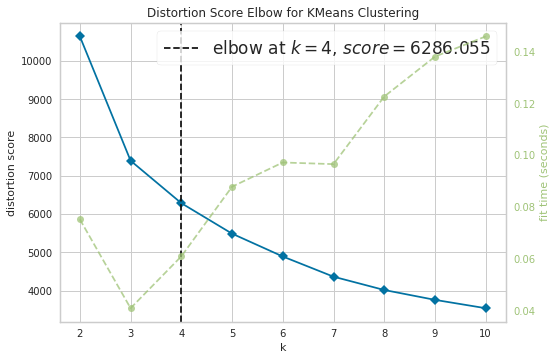

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [269]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=10)

visualizer.fit(PCA_df)        # Fit the data to the visualizer
visualizer.show()  

In [270]:
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
AC_df = AC.fit_predict(PCA_df)
PCA_df["clusters"] = AC_df
#Adding the Clusters feature to the orignal dataframe.
df["clusters"]= AC_df

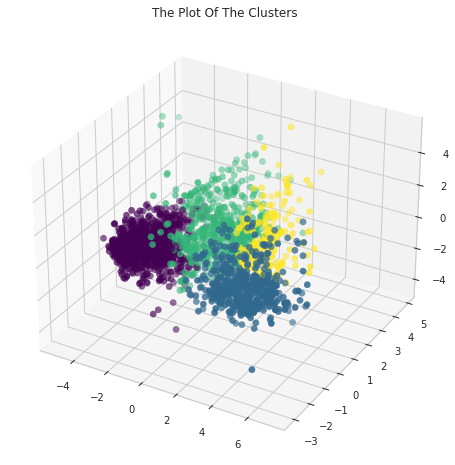

In [271]:
x =PCA_df["Education"]
y =PCA_df["Income"]
z =PCA_df["Kidhome"]


#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

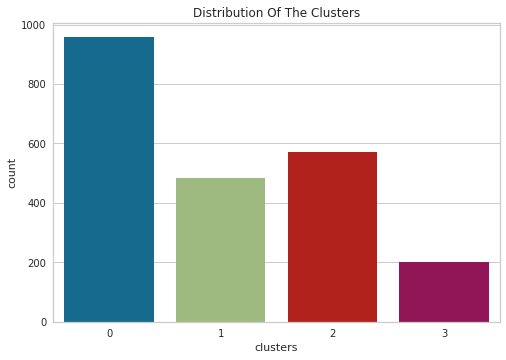

In [272]:
pl = sns.countplot(x=df["clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

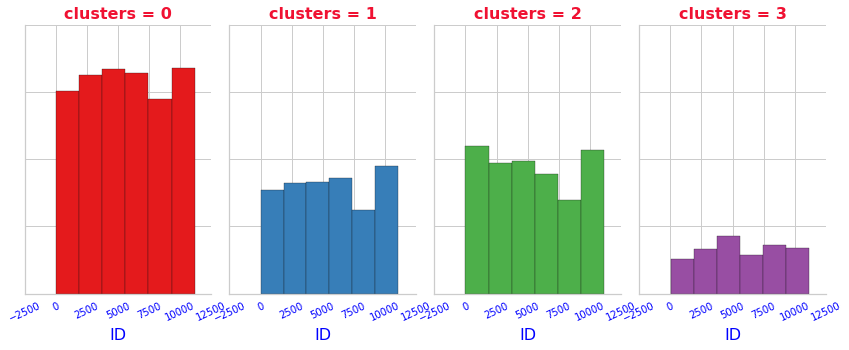

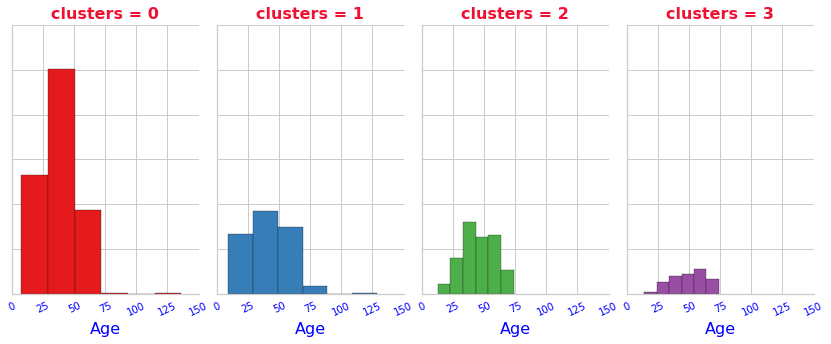

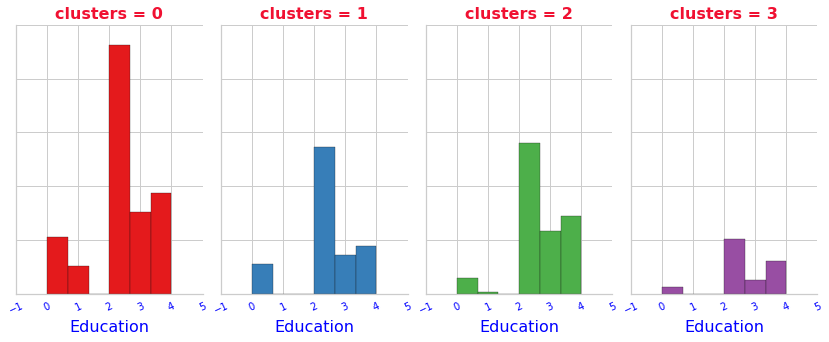

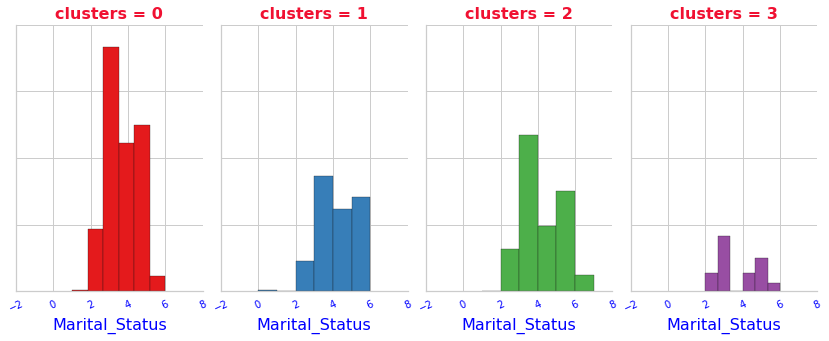

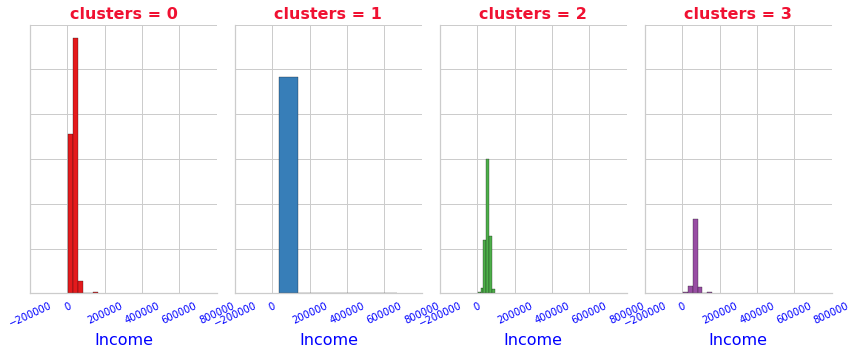

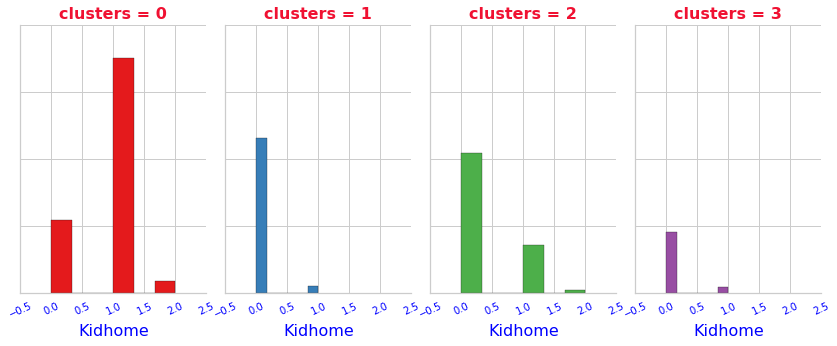

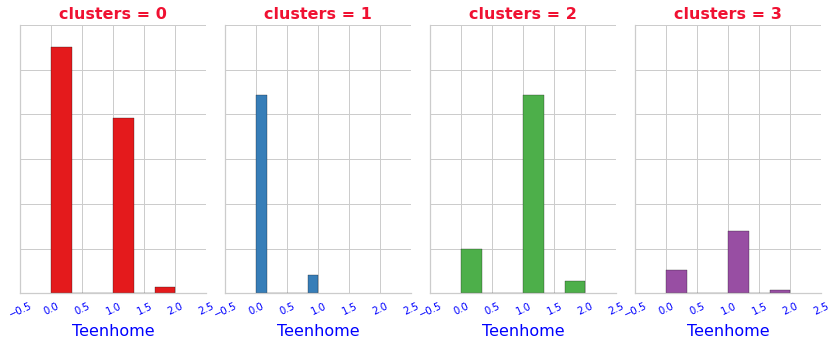

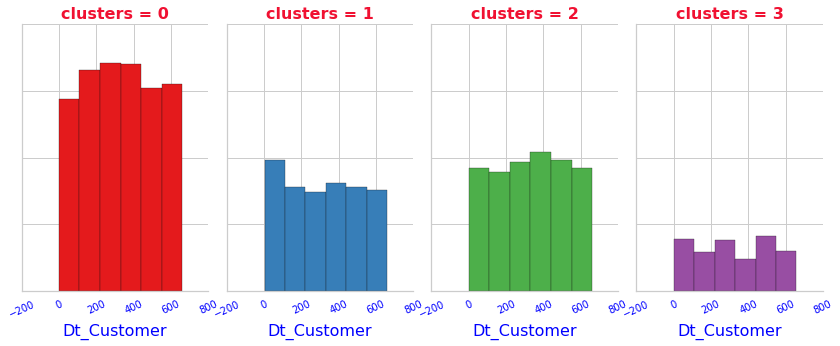

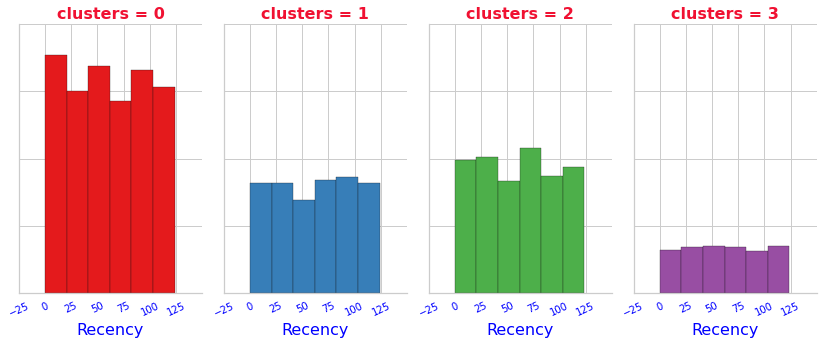

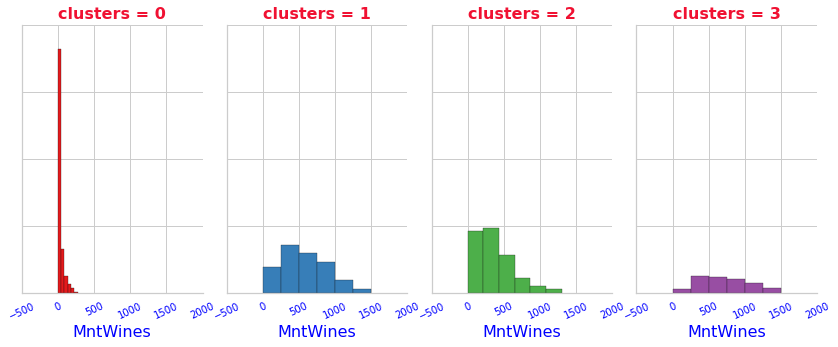

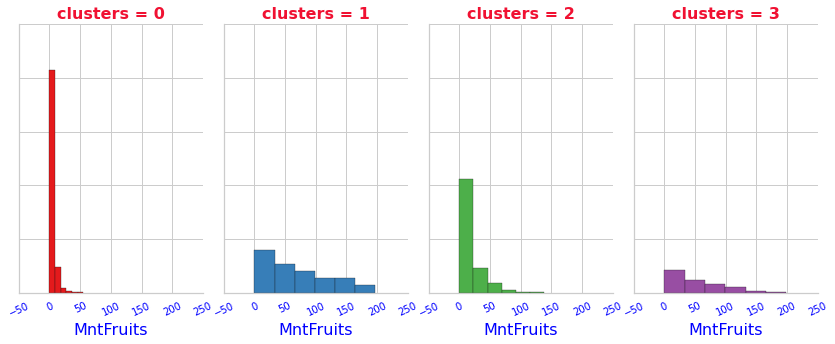

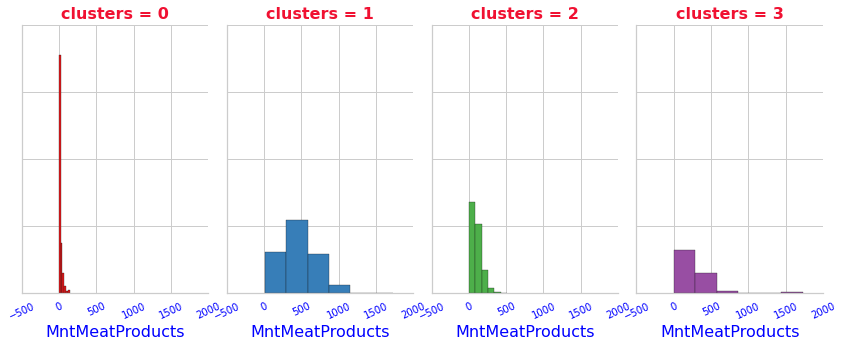

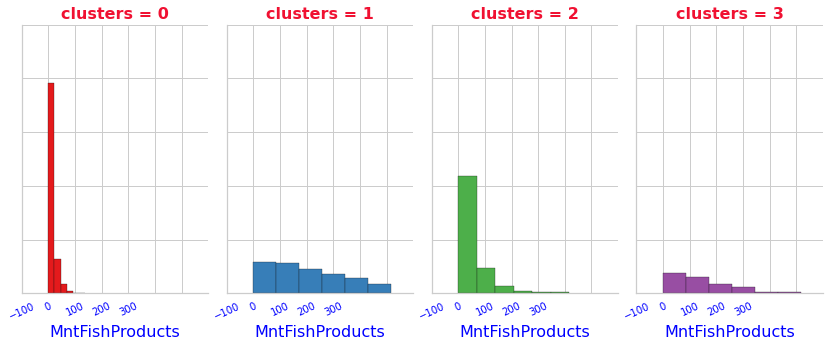

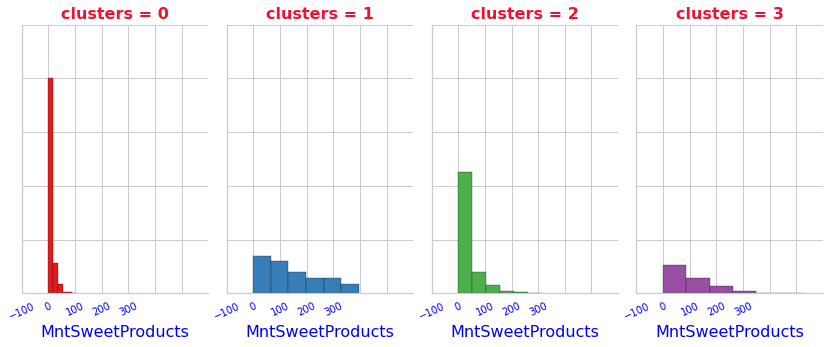

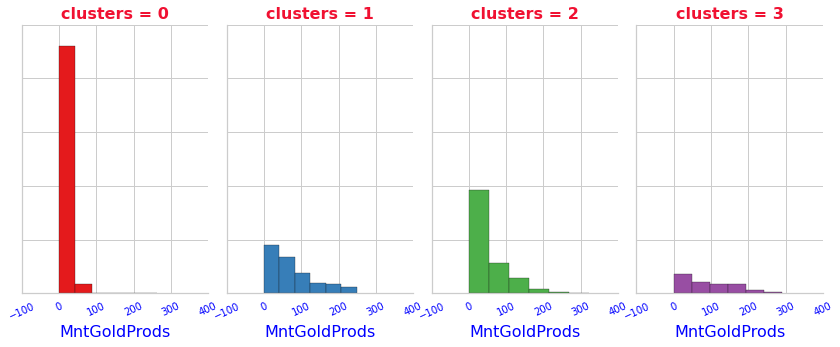

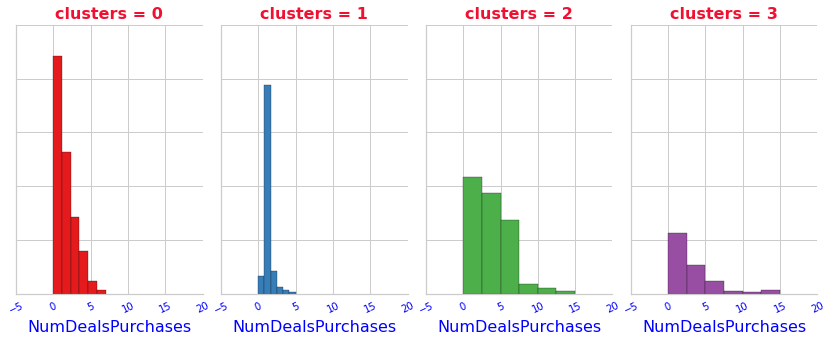

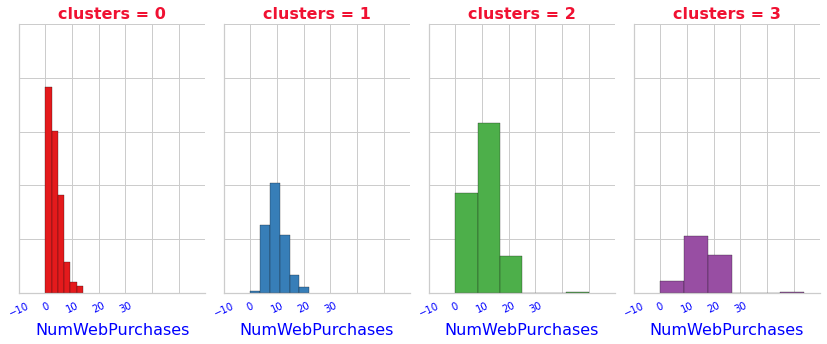

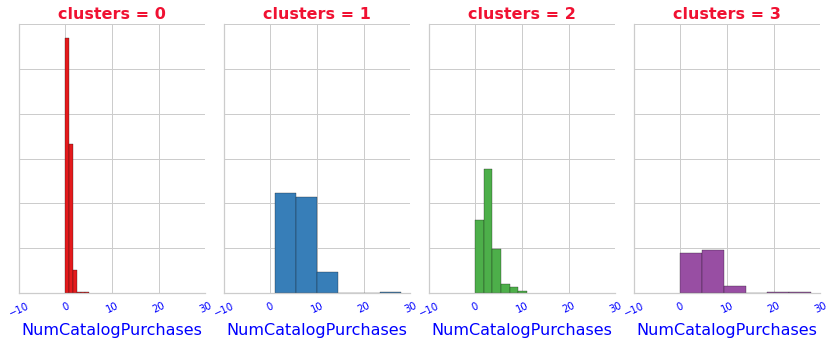

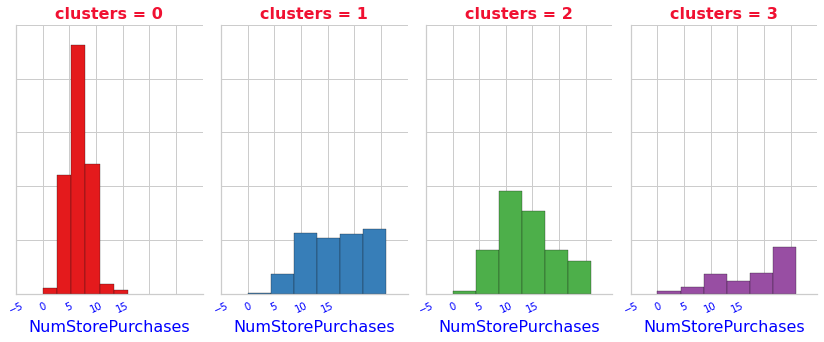

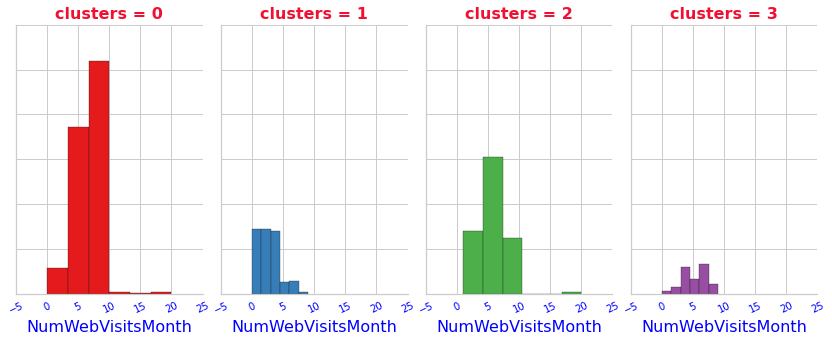

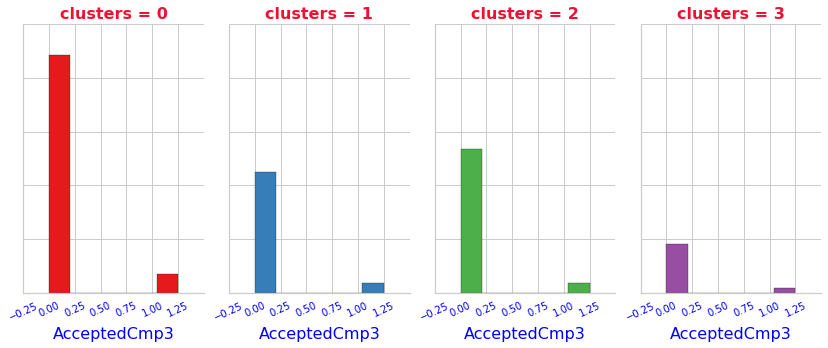

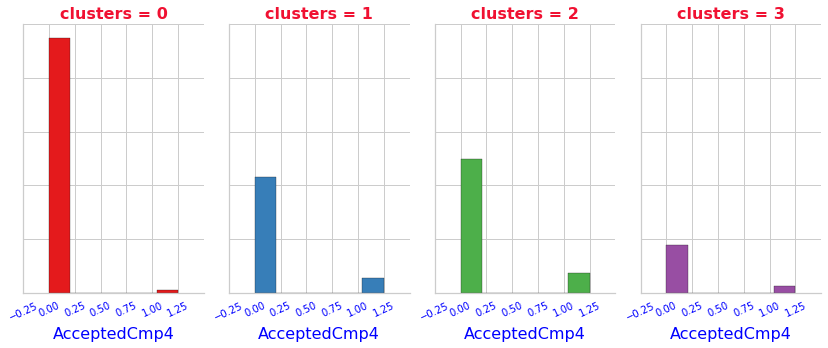

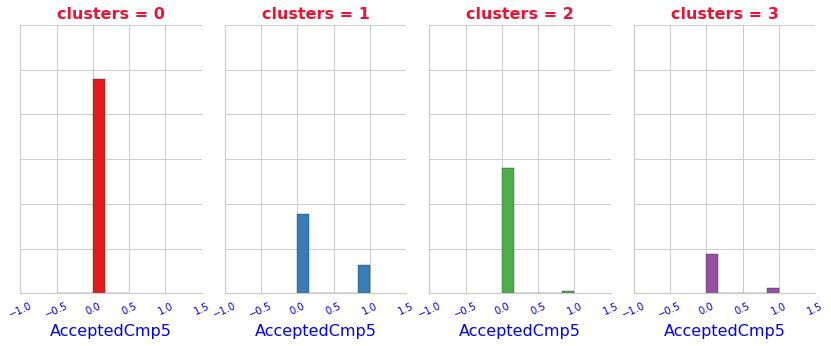

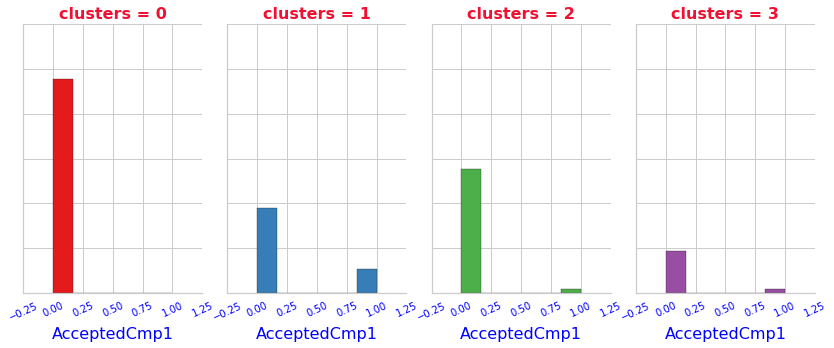

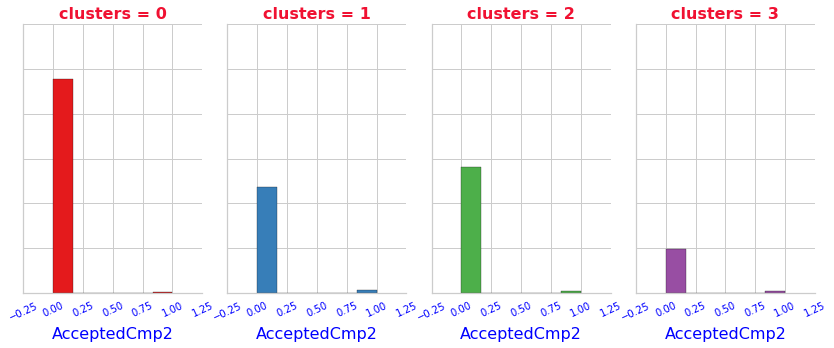

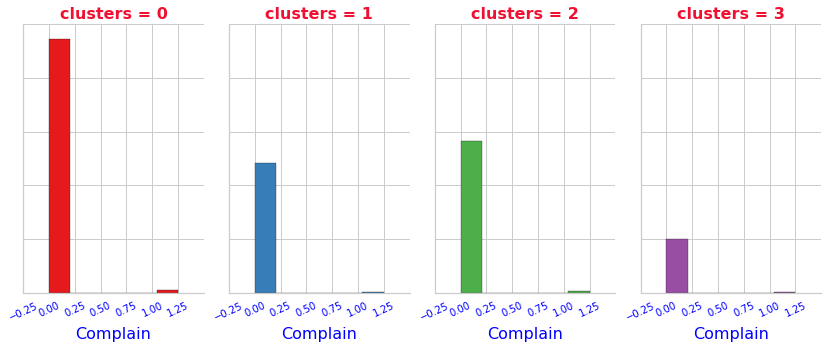

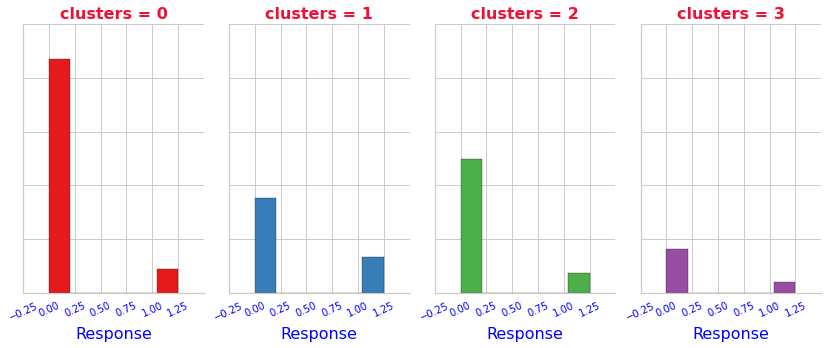

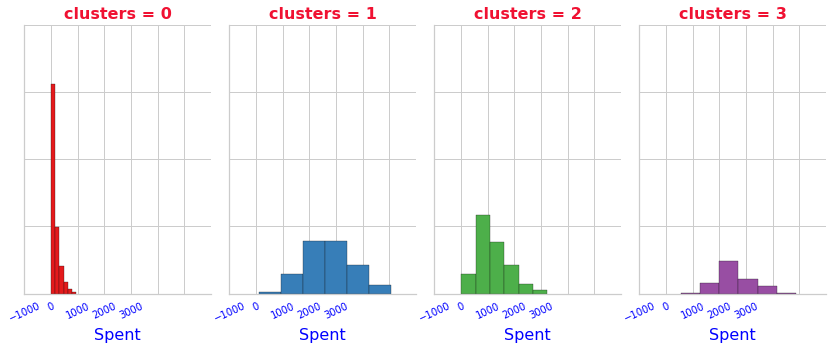

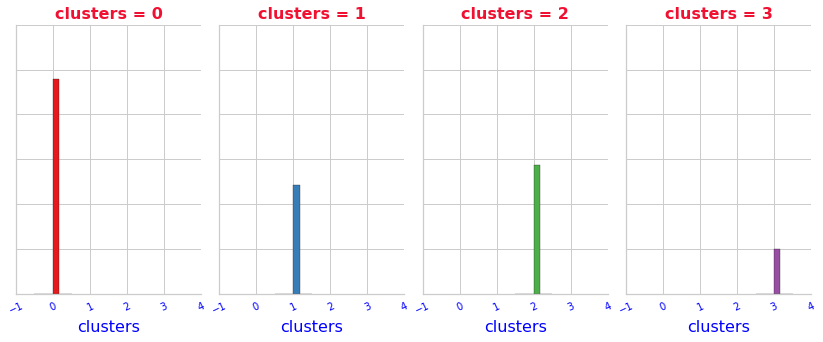

In [273]:
for i in df:
    diag = sns.FacetGrid(df, col = "clusters", hue = "clusters", palette = "Set1")
    diag.map(plt.hist, i, bins=6, ec="k") 
    diag.set_xticklabels(rotation=25, color = 'blue')
    diag.set_yticklabels(color = 'blue')
    diag.set_xlabels(size=16, color = 'blue')
    diag.set_titles(size=16, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(6)

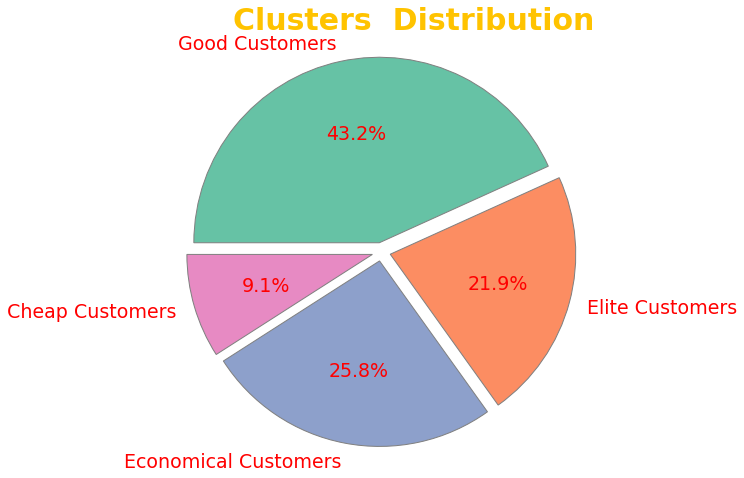

In [274]:
import matplotlib as mpl

clusters_count = df['clusters'].value_counts()                        # Counting wins-losses-draws
clusters_count = clusters_count.to_frame().reset_index()                      # Convert series to dataframe
clusters_count.columns = ['clusters', 'count']                                # Rename column names
clusters_count = clusters_count.sort_values('clusters', ascending = True)     # Sorting data

labels = [
        "Good Customers", 
        "Elite Customers", 
        "Economical Customers", 
        "Cheap Customers"
        ]

# Visualization
plt.figure(figsize=(12,8))

mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:4]

plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05, 0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="red", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth': 1}
        )

plt.axis('equal')

# Title 
plt.text(-0.8, 1.2, "Clusters  Distribution", size=30, color="#FFC300", fontweight="bold")




plt.show()

# Affinity Clustering Model

In [275]:
from sklearn.cluster import AffinityPropagation
#Initiating the Affinity Clustering model 
AP = AffinityPropagation(damping=0.9)
# fit model and predict clusters
AP_df = AP.fit_predict(PCA_df)
PCA_df["Clusters"] = AP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AP_df

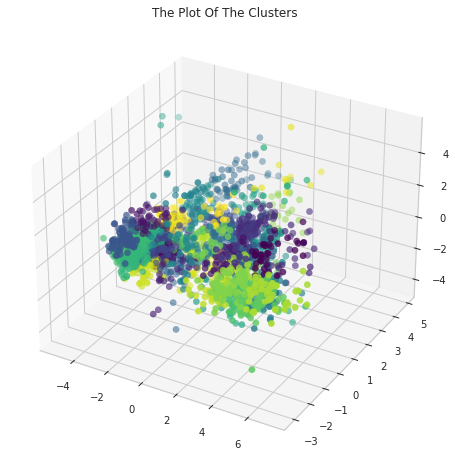

In [276]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

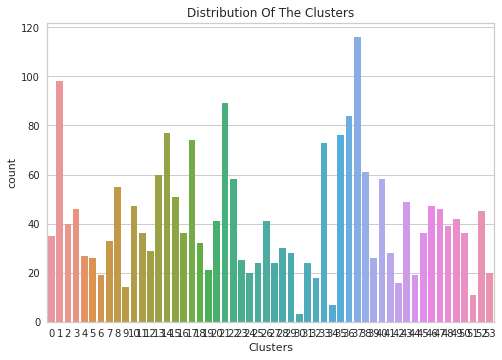

In [277]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# BIRCH

BIRCH Clustering (BIRCH is short for Balanced Iterative Reducing and Clustering using Hierarchies) involves constructing a tree structure from which cluster centroids are extracted.
It is implemented via the Birch class and the main configuration to tune is the “threshold” and “n_clusters” hyperparameters, the latter of which provides an estimate of the number of clusters.

In [278]:
from sklearn.cluster import Birch
#Initiating the Birch Clustering model 
BP = Birch(threshold=0.01, n_clusters=4)
# fit model and predict clusters
BP_df = BP.fit_predict(PCA_df)
PCA_df["Clusters"] = BP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= BP_df

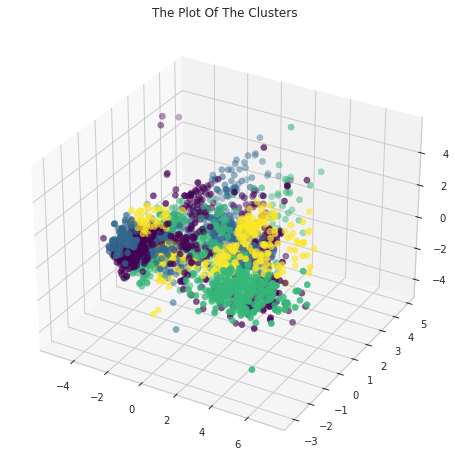

In [279]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

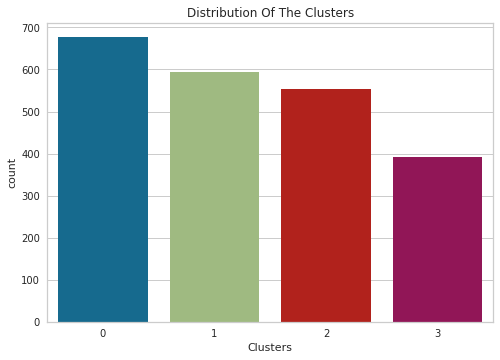

In [280]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# DBSCAN

DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.¶
It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters

In [281]:
from sklearn.cluster import DBSCAN
#Initiating the BBSCAN Clustering model 
DP = DBSCAN(eps=0.30, min_samples=9)
# fit model and predict clusters
DP_df = DP.fit_predict(PCA_df)
PCA_df["Clusters"] = DP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= DP_df

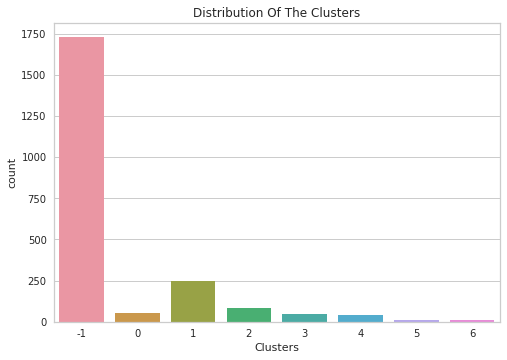

In [282]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# Mini-Batch K-Means¶
 Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.
It is implemented via the MiniBatchKMeans class and the main configuration to tune is the “n_clusters” hyperparameter set to the estimated number of clusters in the data.

In [283]:
from sklearn.cluster import MiniBatchKMeans
#Initiating the MiniBatchKMeans Clustering model 
MP = MiniBatchKMeans(n_clusters=4)
# fit model and predict clusters
MP_df = MP.fit_predict(PCA_df)
PCA_df["Clusters"] = MP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= MP_df

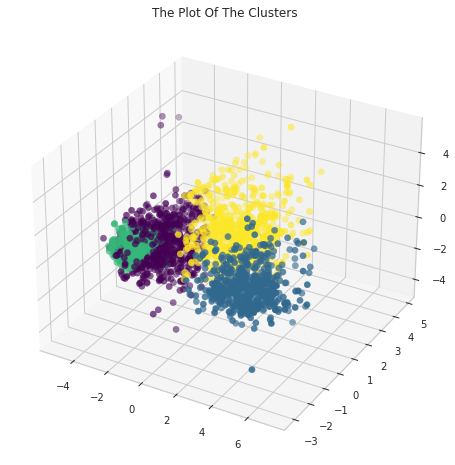

In [284]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

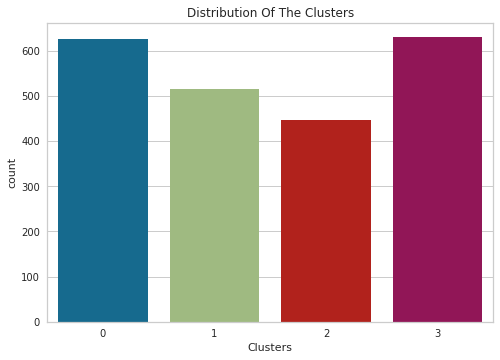

In [285]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# AgglomerativeClustering

In [286]:
from sklearn.cluster import AgglomerativeClustering

In [287]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the AgglomerativeClustering Clustering model 
AGG =  AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
AGG_df = AGG.fit_predict(PCA_df)
PCA_df["Clusters"] = AGG_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AGG_df

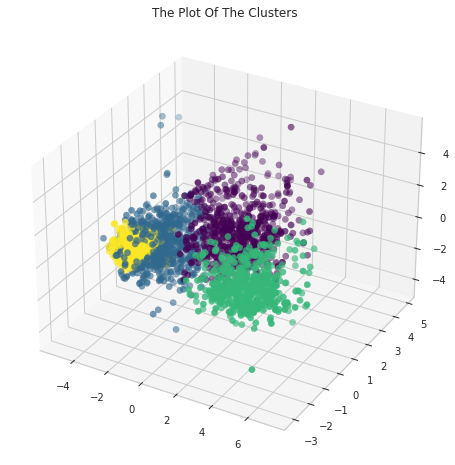

In [288]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

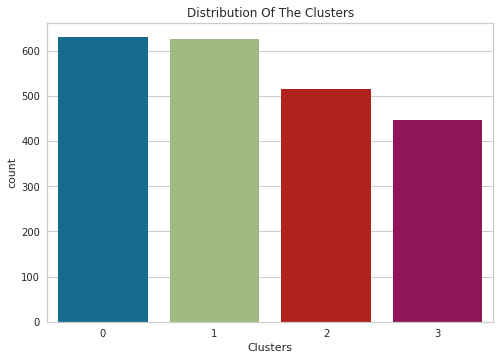

In [289]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# MeanShift

In [290]:
from sklearn.cluster import MeanShift


#Initiating the AgglomerativeClustering Clustering model 
MS =  MeanShift()
# fit model and predict clusters
MS_df = MS.fit_predict(PCA_df)
PCA_df["Clusters"] = MS_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= MS_df

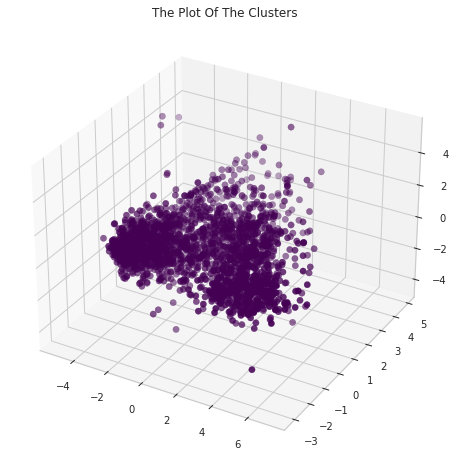

In [291]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

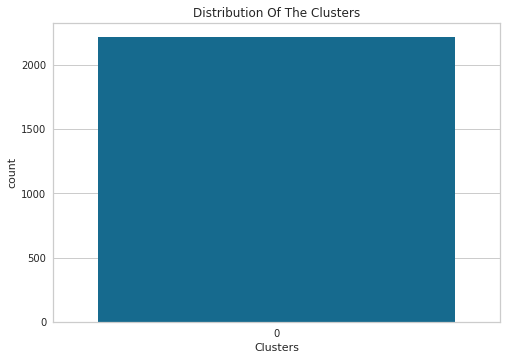

In [292]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# OPTICS


In [293]:
from sklearn.cluster import OPTICS

OP =  OPTICS(eps=0.9, min_samples=50)
# fit model and predict clusters
OP_df = OP.fit_predict(PCA_df)
PCA_df["Clusters"] = OP_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= OP_df

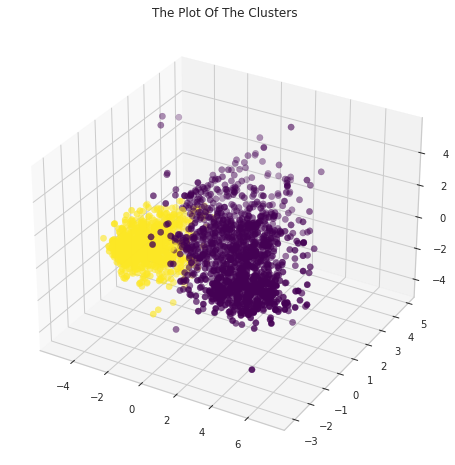

In [294]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

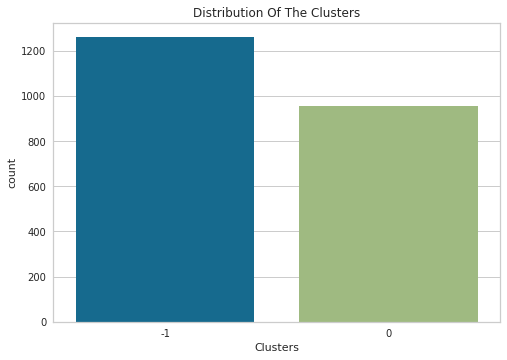

In [295]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# Spectral Clustering

In [296]:
from sklearn.cluster import SpectralClustering

SC=SpectralClustering(n_clusters=4)
# fit model and predict clusters
SC_df = SC.fit_predict(PCA_df)
PCA_df["Clusters"] = SC_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= SC_df

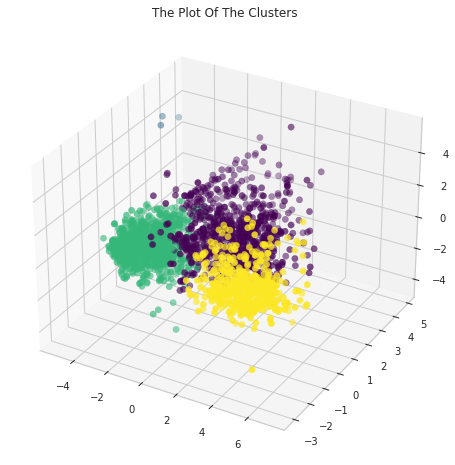

In [297]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

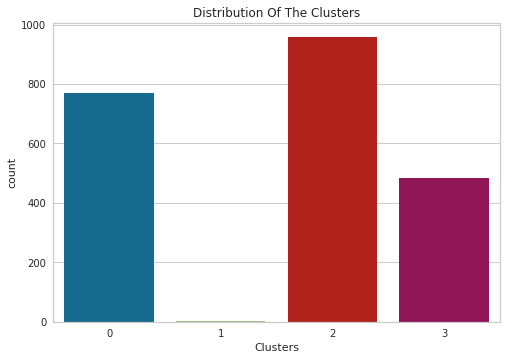

In [298]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# Gaussian Mixture Model

In [299]:
from sklearn.mixture import GaussianMixture


GM=GaussianMixture(n_components=4)
# fit model and predict clusters
GM_df = GM.fit_predict(PCA_df)
PCA_df["Clusters"] = GM_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= GM_df

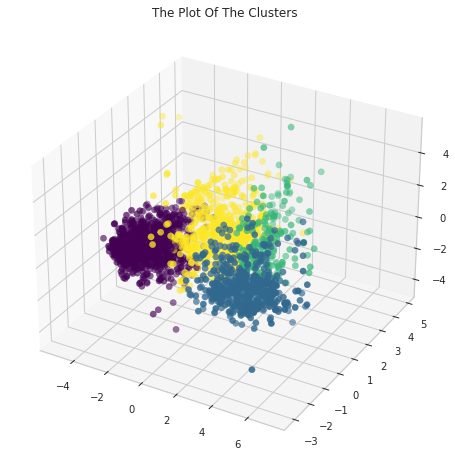

In [300]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

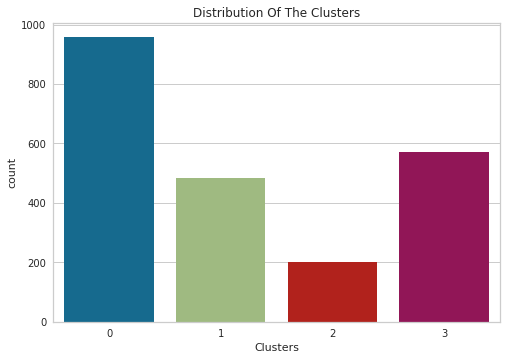

In [301]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

# Hierarchical clustering

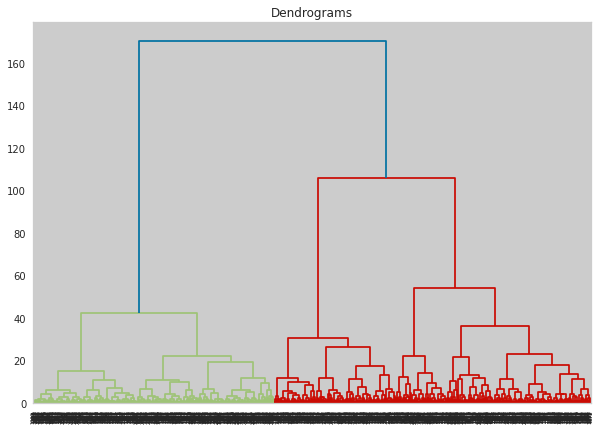

In [302]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(PCA_df, method='ward'))

In [303]:
from sklearn.cluster import AgglomerativeClustering


AC= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
# fit model and predict clusters
AC_df = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = AC_df
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= AC_df

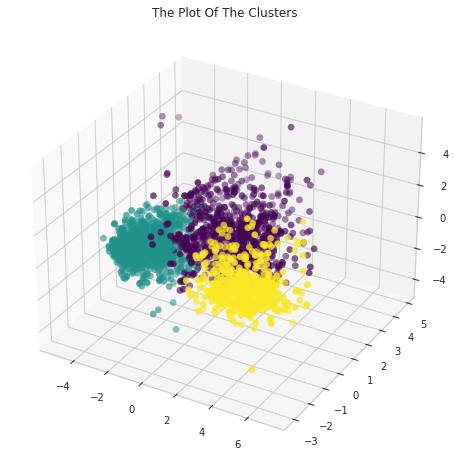

In [304]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

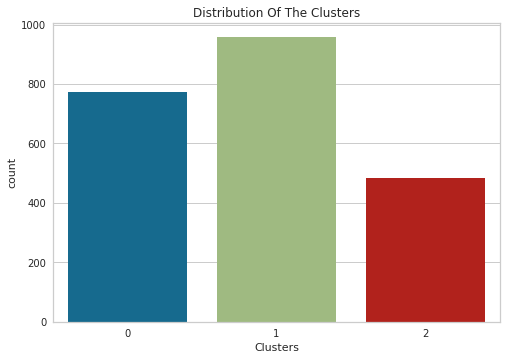

In [305]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()